# Natural Gas Powerplants and Environmental Justice - Nationwide and in Maryland

In [93]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [94]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [95]:
%%R

require('tidyverse')
require('DescTools')

In [141]:
df = pd.read_csv('eji_proposed_plants_one_row_per_geoid.csv')
df.head()

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,GEOID_2020,COUNTY_x,StateDesc,STATEABBR,LOCATION,E_TOTPOP,M_TOTPOP,E_DAYPOP,SPL_EJI,RPL_EJI,SPL_SER,RPL_SER,SPL_EJI_CBM,RPL_EJI_CBM,E_MINRTY,EPL_MINRTY,SPL_SVM_DOM1,RPL_SVM_DOM1,E_POV200,EPL_POV200,E_NOHSDP,EPL_NOHSDP,E_UNEMP,EPL_UNEMP,E_RENTER,EPL_RENTER,E_HOUBDN,EPL_HOUBDN,E_UNINSUR,EPL_UNINSUR,E_NOINT,EPL_NOINT,SPL_SVM_DOM2,RPL_SVM_DOM2,E_AGE65,EPL_AGE65,E_AGE17,EPL_AGE17,E_DISABL,EPL_DISABL,E_LIMENG,EPL_LIMENG,SPL_SVM_DOM3,RPL_SVM_DOM3,E_MOBILE,EPL_MOBILE,E_GROUPQ,EPL_GROUPQ,SPL_SVM_DOM4,RPL_SVM_DOM4,SPL_SVM,RPL_SVM,E_OZONE,EPL_OZONE,E_PM,EPL_PM,E_DSLPM,EPL_DSLPM,E_TOTCR,EPL_TOTCR,SPL_EBM_DOM1,RPL_EBM_DOM1,E_NPL,EPL_NPL,E_TRI,EPL_TRI,E_TSD,EPL_TSD,E_RMP,EPL_RMP,E_COAL,EPL_COAL,E_LEAD,EPL_LEAD,SPL_EBM_DOM2,RPL_EBM_DOM2,E_PARK,EPL_PARK,E_HOUAGE,EPL_HOUAGE,E_WLKIND,EPL_WLKIND,SPL_EBM_DOM3,RPL_EBM_DOM3,E_RAIL,EPL_RAIL,E_ROAD,EPL_ROAD,E_AIRPRT,EPL_AIRPRT,SPL_EBM_DOM4,RPL_EBM_DOM4,E_IMPWTR,EPL_IMPWTR,F_IMPWTR,SPL_EBM_DOM5,RPL_EBM_DOM5,SPL_EBM,RPL_EBM,E_ASTHMA,EPL_ASTHMA,F_ASTHMA,E_CANCER,EPL_CANCER,F_CANCER,E_CHD,EPL_CHD,F_CHD,E_MHLTH,EPL_MHLTH,F_MHLTH,E_DIABETES,EPL_DIABETES,F_DIABETES,F_HVM,RPL_HVM,E_NEHD,EPL_NEHD,SPL_CBM_DOM1,RPL_CBM_DOM1,E_BURN,EPL_BURN,E_SMOKE,EPL_SMOKE,SPL_CBM_DOM2,RPL_CBM_DOM2,E_CFLD,EPL_CFLD,F_CFLD,E_DRGT,EPL_DRGT,F_DRGT,E_HRCN,EPL_HRCN,F_HRCN,E_RFLD,EPL_RFLD,F_RFLD,E_SWND,EPL_SWND,F_SWND,E_TRND,EPL_TRND,F_TRND,SPL_CBM_DOM3,RPL_CBM_DOM3,SPL_CBM,RPL_CBM,AFAM,E_AFAM,HISP,E_HISP,ASIAN,E_ASIAN,AIAN,E_AIAN,NHPI,E_NHPI,TWOMORE,E_TWOMORE,OTHERRACE,E_OTHERRACE,Tribe_PCT_Tract,Tribe_Names,Tribe_Flag,Unnamed: 0.1,Unnamed: 0,plant_name,Plant Code,State,Sector Name,Prime Movers,Fuel Types,Primary Technology,withdrawal_volume_million_gallons,discharge_volume_million_gallons,consumption_volume_million_gallons,energy_category,map_link,longitude,latitude,STATE,COUNTY_y,TRACT,contains_energy_source,Technology_Category,Category_Number,fossil_fuels,renewables,energy_category_numeric,Power Plant,Owner,Description,Latitude,Longitude,IntPtLat,IntPtLon,proposed_location,Band,distance_to_plant,num_energy_sources,plant_names
0,1.0,1.0,20100.0,140000US01001020100,1.001020e+09,1.001020e+09,Autauga County,Alabama,AL,Census Tract 201; Autauga County; Alabama,1865.0,368.0,943.0,1.3991,0.5685,0.7991,0.3536,1.5356,0.3476,23.4,0.3833,0.3833,0.3833,25.6836,0.4529,16.2,0.7660,2.6,0.2443,25.9,0.4369,17.9,0.2697,8.2,0.5842,8.1,0.3859,3.1399,0.4179,19.5,0.6666,24.0,0.6504,20.1,0.8586,0.0,0.0000,2.1756,0.6563,12.6,0.8240,0.0,0.0000,0.8240,0.5067,6.5228,0.4541,0.091,0.3188,0.0,0.0,0.1692,0.3622,40.0,0.9248,1.6058,0.5437,0.0,0.0,32.6935,0.5965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5965,0.2675,84.1618,0.6725,56.1,0.5058,6.3333,0.7379,1.9162,0.7429,74.0860,0.6896,51.2604,0.3653,0.0,0.0,1.0549,0.4931,0.0,0.0,0.0,0.0,0.0,5.1734,0.3450,11.0,0.6239,0.0,8.6,0.5721,0.0,8.4,0.7441,1.0,20.0,0.8042,1.0,13.8,0.6922,1.0,3.0,0.6,8.6,0.2039,0.2039,0.2039,0.0,0.0,4.5,0.1270,0.1270,0.1262,0.0,0.0,1.0,26.0909,0.6637,9.0,0.076,0.5691,9.0,1.0833,0.244,9.0,1.205,0.3395,9.0,0.0000,0.0000,0.0,1.8163,0.5025,2.1472,0.1365,208.0,11.2,81.0,4.3,45.0,2.4,0.0,0.0,0.0,0.0,103.0,5.5,0.0,0.0,0.0,-999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,32.476823,-86.486599,0,4,14.394846,0,NaN
1,1.0,1.0,20200.0,140000US01001020200,1.001020e+09,1.001020e+09,Autauga County,Alabama,AL,Census Tract 202; Autauga County; Alabama,1861.0,396.0,4081.0,1.2619,0.4907,0.8619,0.4049,1.3951,0.2725,63.8,0.7571,0.7571,0.7571,26.2432,0.4654,8.7,0.5041,5.5,0.5945,21.1,0.3489,17.5,0.2551,7.8,0.5605,21.5,0.8530,3.5815,0.5222,15.7,0.4633,9.9,0.0591,20.4,0.8662,0.0,0.0000,1.3886,0.1199,1.2,0.5585,9.9,0.9497,1.5082,0.8877,7.2354,0.5811,0.091,0.3188,0.0,0.0,0.1769,0.3847,40.0,0.9248,1.6283,0.5518,0.0,0.0,50.9214,0.6639,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6639,0.2923,100.0000,0.5514,68.2,0.6431,8.5833,0.5168,1.7113,0.5722,77.8517,0.7019,10.2446,0.1662,0.0,0.0,0.8681,0.4027,0.0,0.0,0.0,0.0,0.0,4.8716,0.2808

In [147]:
df['proposed_location'].value_counts()

proposed_location
0    85276
1       31
Name: count, dtype: int64

In [142]:
df['within_1_km'] = (df['Band'] == 1).astype(int)
df['within_5_km'] = df['Band'].isin([1, 2]).astype(int)
df['within_10_km'] = df['Band'].isin([1, 2, 3]).astype(int)
df['within_20_km'] = df['Band'].isin([1, 2, 3, 4]).astype(int)

In [143]:
df['natural_gas'] = df['Category_Number'] == 2

In [144]:
df_within_5_km = df[df['within_5_km'] == 1].copy()
df_within_10_km = df[df['within_10_km'] == 1].copy()
df_within_20_km = df[df['within_20_km'] == 1].copy()

In [145]:
df_within_5_km.to_csv("tracts_within_5_km_plant.csv", index=False)
df_within_10_km.to_csv("tracts_within_10_km_plant.csv", index=False)
df_within_20_km.to_csv("tracts_within_20_km_plant.csv", index=False)

In [146]:
pd.set_option('display.max_columns', None)

In [118]:
# with pd.option_context('display.max_rows', None):
#     display(df_within_5_km[df_within_5_km['StateDesc'] == 'Maryland'])

In [114]:
md_within_5_km = df_within_5_km[df_within_5_km['StateDesc'] == 'Maryland']

In [115]:
md_within_10_km = df_within_10_km[df_within_10_km['StateDesc'] == 'Maryland']

In [116]:
md_within_20_km = df_within_20_km[df_within_20_km['StateDesc'] == 'Maryland']

In [117]:
md_within_5_km.to_csv("md_tracts_within_5_km_plant.csv", index=False)
md_within_10_km.to_csv("md_tracts_within_10_km_plant.csv", index=False)
md_within_20_km.to_csv("md_tracts_within_20_km_plant.csv", index=False)

In [148]:
md = df[df['StateDesc'] == 'Maryland']

In [149]:
md.to_csv('md_tracts_with_proposed_locations.csv',index=False)

# Regressions - National Level

In [119]:
%%R

df_5_km <- read.csv('tracts_within_5_km_plant.csv')

In [122]:
%%R

df_10_km <- read.csv('tracts_within_10_km_plant.csv')

In [123]:
%%R

df_20_km <- read.csv('tracts_within_20_km_plant.csv')

In [121]:
%%R

model <- lm(distance_to_plant ~ E_POV200, data=df_5_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_POV200, data = df_5_km)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.94811 -0.88636  0.07183  0.96702  1.97452 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.2414230  0.0206992 156.597  < 2e-16 ***
E_POV200    -0.0028040  0.0005371  -5.221 1.81e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.143 on 11999 degrees of freedom
  (1342 observations deleted due to missingness)
Multiple R-squared:  0.002266,	Adjusted R-squared:  0.002183 
F-statistic: 27.26 on 1 and 11999 DF,  p-value: 1.812e-07



`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 1342 rows containing non-finite outside the scale range
(`stat_smooth()`). 

R[write to console]: 2: Removed 1342 rows containing missing values or values outside the scale range
(`geom_point()`). 



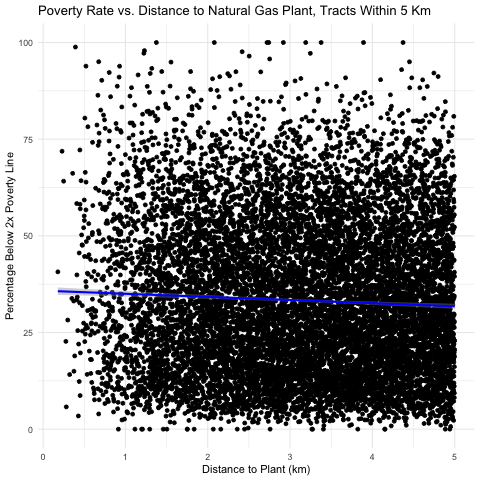

In [128]:
%%R

    ggplot(df_5_km) +
    aes(x=distance_to_plant, y=E_POV200) +
    geom_point() +
    geom_smooth(method = "lm", se = TRUE, color = "blue") +
          labs(
            title = "Poverty Rate vs. Distance to Natural Gas Plant, Tracts Within 5 Km",
            x = "Distance to Plant (km)",
            y = "Percentage Below 2x Poverty Line"
          ) +
          theme_minimal()

In [124]:
%%R

model <- lm(distance_to_plant ~ E_POV200, data=df_10_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_POV200, data = df_10_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.3740 -1.9828 -0.0598  1.9613  5.0627 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.7126645  0.0292031  195.62   <2e-16 ***
E_POV200    -0.0099050  0.0007812  -12.68   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.431 on 26265 degrees of freedom
  (1516 observations deleted due to missingness)
Multiple R-squared:  0.006084,	Adjusted R-squared:  0.006046 
F-statistic: 160.8 on 1 and 26265 DF,  p-value: < 2.2e-16



`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 1516 rows containing non-finite outside the scale range
(`stat_smooth()`). 

R[write to console]: 2: Removed 1516 rows containing missing values or values outside the scale range
(`geom_point()`). 



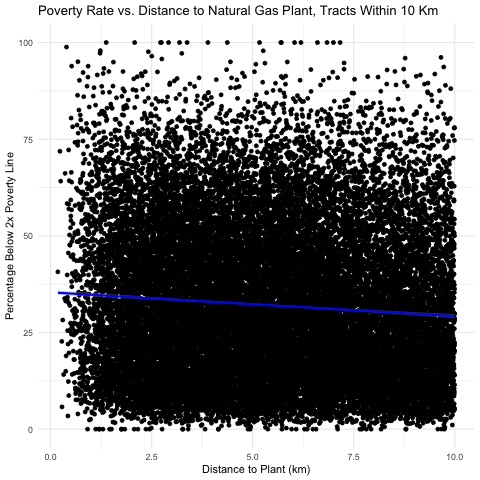

In [129]:
%%R

    ggplot(df_10_km) +
    aes(x=distance_to_plant, y=E_POV200) +
    geom_point() +
    geom_smooth(method = "lm", se = TRUE, color = "blue") +
          labs(
            title = "Poverty Rate vs. Distance to Natural Gas Plant, Tracts Within 10 Km",
            x = "Distance to Plant (km)",
            y = "Percentage Below 2x Poverty Line"
          ) +
          theme_minimal()

## The correlation between poverty and distance to plant gets stronger the farther away the tract is from the plant (i.e. it is the strongest in the 20 km dataset)

In [130]:
%%R

model <- lm(distance_to_plant ~ E_AFAM, data=df_5_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_AFAM, data = df_5_km)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.96392 -0.89442  0.07346  0.97204  1.86041 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.1391509  0.0128101  245.05   <2e-16 ***
E_AFAM      0.0004789  0.0004649    1.03    0.303    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.146 on 12036 degrees of freedom
  (1305 observations deleted due to missingness)
Multiple R-squared:  8.817e-05,	Adjusted R-squared:  5.093e-06 
F-statistic: 1.061 on 1 and 12036 DF,  p-value: 0.3029



In [131]:
%%R

model <- lm(distance_to_plant ~ E_AFAM, data=df_10_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_AFAM, data = df_10_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.2056 -1.9924 -0.0599  1.9683  4.6226 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.3756820  0.0183167 293.485   <2e-16 ***
E_AFAM      0.0011009  0.0006498   1.694   0.0902 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.439 on 26330 degrees of freedom
  (1451 observations deleted due to missingness)
Multiple R-squared:  0.000109,	Adjusted R-squared:  7.103e-05 
F-statistic:  2.87 on 1 and 26330 DF,  p-value: 0.09024



In [132]:
%%R

model <- lm(distance_to_plant ~ E_AFAM, data=df_20_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_AFAM, data = df_20_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.8676 -4.3225 -0.9246  3.9713 11.7410 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.122667   0.030001 304.074   <2e-16 ***
E_AFAM      -0.009145   0.001093  -8.367   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.178 on 43342 degrees of freedom
  (1832 observations deleted due to missingness)
Multiple R-squared:  0.001613,	Adjusted R-squared:  0.00159 
F-statistic: 70.01 on 1 and 43342 DF,  p-value: < 2.2e-16



`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 1832 rows containing non-finite outside the scale range
(`stat_smooth()`). 

R[write to console]: 2: Removed 1832 rows containing missing values or values outside the scale range
(`geom_point()`). 



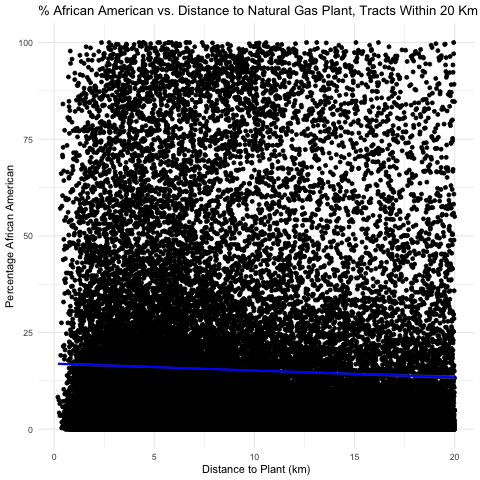

In [133]:
%%R

    ggplot(df_20_km) +
    aes(x=distance_to_plant, y=E_AFAM) +
    geom_point() +
    geom_smooth(method = "lm", se = TRUE, color = "blue") +
          labs(
            title = "% African American vs. Distance to Natural Gas Plant, Tracts Within 20 Km",
            x = "Distance to Plant (km)",
            y = "Percentage African American"
          ) +
          theme_minimal()

In [125]:
%%R

model <- lm(distance_to_plant ~ E_POV200, data=df_20_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_POV200, data = df_20_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.6542 -4.2397 -0.8826  3.8693 13.4024 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.161202   0.046672  217.71   <2e-16 ***
E_POV200    -0.039122   0.001316  -29.72   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.129 on 43241 degrees of freedom
  (1933 observations deleted due to missingness)
Multiple R-squared:  0.02001,	Adjusted R-squared:  0.01999 
F-statistic: 883.1 on 1 and 43241 DF,  p-value: < 2.2e-16



`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 1933 rows containing non-finite outside the scale range
(`stat_smooth()`). 

R[write to console]: 2: Removed 1933 rows containing missing values or values outside the scale range
(`geom_point()`). 



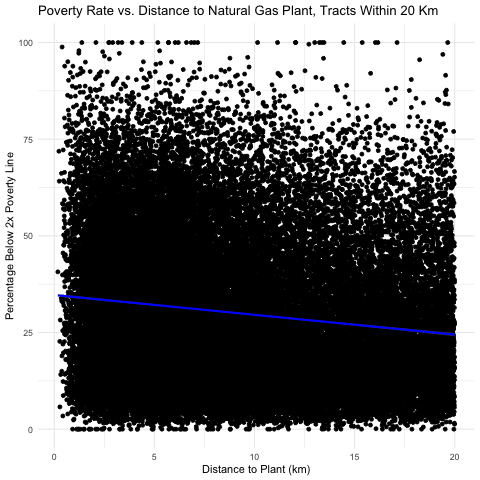

In [127]:
%%R

    ggplot(df_20_km) +
    aes(x=distance_to_plant, y=E_POV200) +
    geom_point() +
    geom_smooth(method = "lm", se = TRUE, color = "blue") +
          labs(
            title = "Poverty Rate vs. Distance to Natural Gas Plant, Tracts Within 20 Km",
            x = "Distance to Plant (km)",
            y = "Percentage Below 2x Poverty Line"
          ) +
          theme_minimal()

In [15]:
# %%R

# install.packages('fixest')

In [16]:
%%R

library(fixest)

In [17]:
%%R -i df
# Logistic regression with county fixed effects
model <- feglm(
  within_one_km ~ E_POV200 | county, 
  data = df, 
  family = binomial("logit")
)

summary(model)

GLM estimation, family = binomial, Dep. Var.: within_one_km
Observations: 81,458
Fixed-effects: county: 540
Standard-errors: Clustered (county) 
         Estimate Std. Error z value Pr(>|z|)    
E_POV200 0.010403   0.003361 3.09548 0.001965 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Log-Likelihood: -14,388.9   Adj. Pseudo R2: 0.091309
           BIC:  34,895.4     Squared Cor.: 0.072006


NOTES: 3,594 observations removed because of NA values (RHS: 3,594, Fixed-effects: 317).
       1,307 fixed-effects (31,987 observations) removed because of only 0 (or only 1) outcomes.


## Poverty is higher in tracts within one kilometer of a natural gas power plant after controlling for county fixed effects.

In [18]:
%%R -i df
# Logistic regression with county fixed effects
model <- feglm(
  within_5_km ~ E_POV200 | county, 
  data = df, 
  family = binomial("logit")
)

summary(model)

GLM estimation, family = binomial, Dep. Var.: within_5_km
Observations: 84,004
Fixed-effects: county: 571
Standard-errors: Clustered (county) 
         Estimate Std. Error z value  Pr(>|z|)    
E_POV200 0.010803   0.003512 3.07591 0.0020986 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Log-Likelihood: -34,505.8   Adj. Pseudo R2: 0.193535
           BIC:  75,497.2     Squared Cor.: 0.218198


NOTES: 3,594 observations removed because of NA values (RHS: 3,594, Fixed-effects: 317).
       1,276 fixed-effects (29,441 observations) removed because of only 0 (or only 1) outcomes.


In [19]:
%%R -i df
# Logistic regression with county fixed effects
model <- feglm(
  within_10_km ~ E_POV200 | county, 
  data = df, 
  family = binomial("logit")
)

summary(model)

GLM estimation, family = binomial, Dep. Var.: within_10_km
Observations: 86,109
Fixed-effects: county: 621
Standard-errors: Clustered (county) 
         Estimate Std. Error z value Pr(>|z|)    
E_POV200 0.012915   0.003606 3.58122 0.000342 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Log-Likelihood: -42,448.2   Adj. Pseudo R2: 0.248814
           BIC:  91,964.3     Squared Cor.: 0.307406


NOTES: 3,594 observations removed because of NA values (RHS: 3,594, Fixed-effects: 317).
       1,226 fixed-effects (27,336 observations) removed because of only 0 (or only 1) outcomes.


## This association holds even for areas within 5 kilomters and within 10 kilometers near a power plant.

In [20]:
%%R -i df
# Logistic regression with county fixed effects
model <- feglm(
  within_one_km ~ E_AFAM | county, 
  data = df, 
  family = binomial("logit")
)

summary(model)

GLM estimation, family = binomial, Dep. Var.: within_one_km
Observations: 81,664
Fixed-effects: county: 540
Standard-errors: Clustered (county) 
        Estimate Std. Error   z value Pr(>|z|) 
E_AFAM -0.000239    0.00377 -0.063336   0.9495 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Log-Likelihood: -14,503.7   Adj. Pseudo R2: 0.087842
           BIC:  35,126.3     Squared Cor.: 0.070768


NOTES: 3,346 observations removed because of NA values (RHS: 3,346, Fixed-effects: 317).
       1,307 fixed-effects (32,029 observations) removed because of only 0 (or only 1) outcomes.


In [21]:
%%R -i df
# Logistic regression with county fixed effects
model <- feglm(
  within_5_km ~ E_AFAM | county, 
  data = df, 
  family = binomial("logit")
)

summary(model)

GLM estimation, family = binomial, Dep. Var.: within_5_km
Observations: 84,214
Fixed-effects: county: 571
Standard-errors: Clustered (county) 
       Estimate Std. Error z value Pr(>|z|)    
E_AFAM 0.006259   0.002732 2.29111 0.021957 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Log-Likelihood: -34,721.2   Adj. Pseudo R2: 0.190904
           BIC:  75,929.5     Squared Cor.: 0.216508


NOTES: 3,346 observations removed because of NA values (RHS: 3,346, Fixed-effects: 317).
       1,276 fixed-effects (29,479 observations) removed because of only 0 (or only 1) outcomes.


In [22]:
%%R -i df
# Logistic regression with county fixed effects
model <- feglm(
  within_10_km ~ E_AFAM | county, 
  data = df, 
  family = binomial("logit")
)

summary(model)

GLM estimation, family = binomial, Dep. Var.: within_10_km
Observations: 86,340
Fixed-effects: county: 622
Standard-errors: Clustered (county) 
       Estimate Std. Error z value   Pr(>|z|)    
E_AFAM 0.013853   0.002919 4.74567 2.0782e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Log-Likelihood: -42,526.0   Adj. Pseudo R2: 0.249436
           BIC:  92,133.1     Squared Cor.: 0.308248


NOTES: 3,346 observations removed because of NA values (RHS: 3,346, Fixed-effects: 317).
       1,225 fixed-effects (27,353 observations) removed because of only 0 (or only 1) outcomes.


## Percentage African American is higher in places within 5 and 10 kilometers of a natural gas power plant

In [23]:
%%R -i df
# Logistic regression with county fixed effects
model <- feglm(
  within_one_km ~ E_MINRTY | county, 
  data = df, 
  family = binomial("logit")
)

summary(model)

GLM estimation, family = binomial, Dep. Var.: within_one_km
Observations: 81,664
Fixed-effects: county: 540
Standard-errors: Clustered (county) 
         Estimate Std. Error z value Pr(>|z|)    
E_MINRTY 0.003723   0.002022 1.84181 0.065504 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Log-Likelihood: -14,491.8   Adj. Pseudo R2: 0.088563
           BIC:  35,102.6     Squared Cor.: 0.070615


NOTES: 3,346 observations removed because of NA values (RHS: 3,346, Fixed-effects: 317).
       1,307 fixed-effects (32,029 observations) removed because of only 0 (or only 1) outcomes.


In [24]:
%%R -i df
# Logistic regression with county fixed effects
model <- feglm(
  within_5_km ~ E_MINRTY | county, 
  data = df, 
  family = binomial("logit")
)

summary(model)

GLM estimation, family = binomial, Dep. Var.: within_5_km
Observations: 84,214
Fixed-effects: county: 571
Standard-errors: Clustered (county) 
         Estimate Std. Error z value   Pr(>|z|)    
E_MINRTY 0.010384   0.002293 4.52807 5.9526e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Log-Likelihood: -34,475.3   Adj. Pseudo R2: 0.19654 
           BIC:  75,437.8     Squared Cor.: 0.222335


NOTES: 3,346 observations removed because of NA values (RHS: 3,346, Fixed-effects: 317).
       1,276 fixed-effects (29,479 observations) removed because of only 0 (or only 1) outcomes.


In [25]:
%%R -i df
# Logistic regression with county fixed effects
model <- feglm(
  within_10_km ~ E_MINRTY | county, 
  data = df, 
  family = binomial("logit")
)

summary(model)

GLM estimation, family = binomial, Dep. Var.: within_10_km
Observations: 86,340
Fixed-effects: county: 622
Standard-errors: Clustered (county) 
         Estimate Std. Error z value   Pr(>|z|)    
E_MINRTY 0.017784   0.002322 7.65979 1.8623e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Log-Likelihood: -41,765.2   Adj. Pseudo R2: 0.262671
           BIC:  90,611.4     Squared Cor.: 0.325074


NOTES: 3,346 observations removed because of NA values (RHS: 3,346, Fixed-effects: 317).
       1,225 fixed-effects (27,353 observations) removed because of only 0 (or only 1) outcomes.


## Percent minority is also higher around power plants (within 5 and within 10 km)

In [28]:
%%R

df_5_km <- read.csv('tracts_within_5_km_natural_gas.csv')

In [53]:
%%R

df_10_km <- read.csv('tracts_within_10_km_natural_gas.csv')

In [44]:
%%R

model <- lm(distance_to_plant ~ E_POV200, data=df_5_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_POV200, data = df_5_km)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.94578 -0.89741  0.08503  0.94720  2.04510 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.2050357  0.0190323 168.400  < 2e-16 ***
E_POV200    -0.0032266  0.0005025  -6.421 1.39e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.161 on 14346 degrees of freedom
  (3989 observations deleted due to missingness)
Multiple R-squared:  0.002866,	Adjusted R-squared:  0.002796 
F-statistic: 41.23 on 1 and 14346 DF,  p-value: 1.395e-10



### As distance to plant increases within a 5 kilometer radius, poverty decreases

In [54]:
%%R

model <- lm(distance_to_plant ~ E_POV200, data=df_10_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_POV200, data = df_10_km)

Residuals:
   Min     1Q Median     3Q    Max 
-5.295 -1.993 -0.065  2.017  4.983 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.5997393  0.0274348  204.11   <2e-16 ***
E_POV200    -0.0074949  0.0007414  -10.11   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.481 on 30902 degrees of freedom
  (4196 observations deleted due to missingness)
Multiple R-squared:  0.003296,	Adjusted R-squared:  0.003264 
F-statistic: 102.2 on 1 and 30902 DF,  p-value: < 2.2e-16



`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 4196 rows containing non-finite outside the scale range
(`stat_smooth()`). 

R[write to console]: 2: Removed 4196 rows containing missing values or values outside the scale range
(`geom_point()`). 



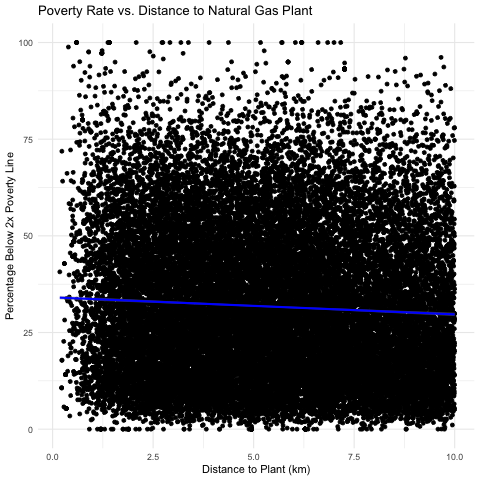

In [58]:
%%R

    ggplot(df_10_km) +
    aes(x=distance_to_plant, y=E_POV200) +
    geom_point() +
      geom_smooth(method = "lm", se = TRUE, color = "blue") +
      labs(
        title = "Poverty Rate vs. Distance to Natural Gas Plant",
        x = "Distance to Plant (km)",
        y = "Percentage Below 2x Poverty Line"
      ) +
      theme_minimal()

`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 3989 rows containing non-finite outside the scale range
(`stat_smooth()`). 

R[write to console]: 2: Removed 3989 rows containing missing values or values outside the scale range
(`geom_point()`). 



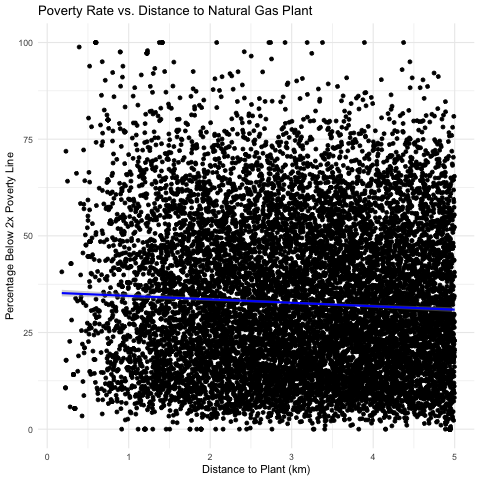

In [57]:
%%R

    ggplot(df_5_km) +
    aes(x=distance_to_plant, y=E_POV200) +
    geom_point() +
      geom_smooth(method = "lm", se = TRUE, color = "blue") +
      labs(
        title = "Poverty Rate vs. Distance to Natural Gas Plant",
        x = "Distance to Plant (km)",
        y = "Percentage Below 2x Poverty Line"
      ) +
      theme_minimal()

In [60]:
%%R

model <- lm(E_ASTHMA ~ distance_to_plant, data=df_5_km)
summary(model)


Call:
lm(formula = E_ASTHMA ~ distance_to_plant, data = df_5_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.3389 -1.1430 -0.1321  0.9404  8.5549 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       10.28411    0.03687 278.949   <2e-16 ***
distance_to_plant  0.02090    0.01113   1.878   0.0605 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.552 on 14360 degrees of freedom
  (3975 observations deleted due to missingness)
Multiple R-squared:  0.0002454,	Adjusted R-squared:  0.0001758 
F-statistic: 3.525 on 1 and 14360 DF,  p-value: 0.06047



In [30]:
# %%R

# head(df_5_km)

In [31]:
# %%R

# library(nnet)

# # Convert county to a factor for fixed-effect-like behavior
# df_5_km$county <- as.factor(df_5_km$county)
# df_5_km$within_5_km_bands <- as.factor(df_5_km$within_5_km_bands)

In [34]:
%%R

model <- multinom( ~ E_POV200 + factor(state), data = df_5_km)
summary(model)

Error in eval(predvars, data, env) : object 'state' not found


RInterpreterError: Failed to parse and evaluate line '\nmodel <- multinom(within_5_km_bands ~ E_POV200 + factor(state), data = df_5_km)\nsummary(model)\n'.
R error message: "Error in eval(predvars, data, env) : object 'state' not found"

In [ ]:
#

In [108]:
# %%R

# require('DescTools')

# PseudoR2(logistic, which='McFadden')

   McFadden 
0.004135378 


In [109]:
# %%R -i df
# logistic <- glm(natural_gas ~ E_POV200 + E_AFAM, data=df, family="binomial")
# summary(logistic)


Call:
glm(formula = natural_gas ~ E_POV200 + E_AFAM, family = "binomial", 
    data = df)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.232298   0.053104 -79.698  < 2e-16 ***
E_POV200     0.009831   0.001521   6.462 1.04e-10 ***
E_AFAM      -0.010135   0.001588  -6.383 1.74e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 15277  on 87468  degrees of freedom
Residual deviance: 15214  on 87466  degrees of freedom
  (2704 observations deleted due to missingness)
AIC: 15220

Number of Fisher Scoring iterations: 7



In [110]:
# %%R

# PseudoR2(logistic, which='McFadden')

   McFadden 
0.004135378 


In [111]:
# %%R -i df
# logistic <- glm(natural_gas ~ E_POV200 + E_AFAM + E_HISP + E_AIAN + E_LIMENG + SPL_SVM_DOM4 + E_UNEMP + E_NOHSDP + E_UNINSUR + E_TOTPOP + E_PARK + E_AGE17 + E_AGE65 + E_ROAD + E_RAIL + E_AIRPRT + E_IMPWTR + E_SMOKE + E_NOINT + E_HOUBDN + E_RENTER + E_DAYPOP, data=df, family="binomial")
# summary(logistic)


Call:
glm(formula = natural_gas ~ E_POV200 + E_AFAM + E_HISP + E_AIAN + 
    E_LIMENG + SPL_SVM_DOM4 + E_UNEMP + E_NOHSDP + E_UNINSUR + 
    E_TOTPOP + E_PARK + E_AGE17 + E_AGE65 + E_ROAD + E_RAIL + 
    E_AIRPRT + E_IMPWTR + E_SMOKE + E_NOINT + E_HOUBDN + E_RENTER + 
    E_DAYPOP, family = "binomial", data = df)

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -3.850e+00  2.074e-01 -18.564  < 2e-16 ***
E_POV200     -7.764e-03  2.982e-03  -2.604  0.00922 ** 
E_AFAM       -2.409e-03  1.910e-03  -1.261  0.20716    
E_HISP        1.200e-02  1.927e-03   6.228 4.74e-10 ***
E_AIAN       -2.223e-02  8.945e-03  -2.485  0.01296 *  
E_LIMENG     -1.856e-02  7.366e-03  -2.520  0.01174 *  
SPL_SVM_DOM4  4.592e-01  6.193e-02   7.416 1.21e-13 ***
E_UNEMP       1.346e-02  6.409e-03   2.099  0.03579 *  
E_NOHSDP      1.784e-03  4.795e-03   0.372  0.70988    
E_UNINSUR     4.033e-03  4.466e-03   0.903  0.36653    
E_TOTPOP      2.028e-05  1.520e-05   1.334  0.18205  

In [112]:
# %%R

# PseudoR2(logistic, which='McFadden')

  McFadden 
0.07098704 


In [113]:
# %%R -i df
# model <- lm(E_TOTCR ~ natural_gas, data=df)
# summary(model)


Call:
lm(formula = E_TOTCR ~ natural_gas, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-18.29  -5.29  -5.29   4.71 374.71 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 25.29480    0.02832 893.122   <2e-16 ***
natural_gas  0.18279    0.21423   0.853    0.394    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.331 on 88054 degrees of freedom
  (2117 observations deleted due to missingness)
Multiple R-squared:  8.267e-06,	Adjusted R-squared:  -3.089e-06 
F-statistic: 0.728 on 1 and 88054 DF,  p-value: 0.3935



In [114]:
# %%R -i df
# model <- lm(E_TOTCR ~ fossil_fuels, data=df)
# summary(model)


Call:
lm(formula = E_TOTCR ~ fossil_fuels, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-18.33  -5.33  -4.21   4.67 374.67 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  25.32795    0.02845 890.282  < 2e-16 ***
fossil_fuels -1.12098    0.17404  -6.441 1.19e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.329 on 88054 degrees of freedom
  (2117 observations deleted due to missingness)
Multiple R-squared:  0.0004709,	Adjusted R-squared:  0.0004596 
F-statistic: 41.49 on 1 and 88054 DF,  p-value: 1.193e-10



In [115]:
# %%R -i df
# model <- lm(E_TOTCR ~ natural_gas + E_POV200 + E_AFAM, data=df)
# summary(model)


Call:
lm(formula = E_TOTCR ~ natural_gas + E_POV200 + E_AFAM, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-18.45  -4.30  -3.66   5.43 375.81 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 24.291127   0.054343 446.993   <2e-16 ***
natural_gas  0.376493   0.208270   1.808   0.0707 .  
E_POV200    -0.014807   0.001667  -8.884   <2e-16 ***
E_AFAM       0.114037   0.001441  79.126   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.028 on 87458 degrees of freedom
  (2711 observations deleted due to missingness)
Multiple R-squared:  0.07221,	Adjusted R-squared:  0.07217 
F-statistic:  2269 on 3 and 87458 DF,  p-value: < 2.2e-16



In [116]:
# %%R -i df
# model <- lm(E_CANCER ~ natural_gas, data=df)
# summary(model)


Call:
lm(formula = E_CANCER ~ natural_gas, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.4878 -1.9878  0.1122  1.7122 19.5122 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.987846   0.009147  873.32  < 2e-16 ***
natural_gas -0.529573   0.069500   -7.62 2.57e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.683 on 87584 degrees of freedom
  (2587 observations deleted due to missingness)
Multiple R-squared:  0.0006625,	Adjusted R-squared:  0.0006511 
F-statistic: 58.06 on 1 and 87584 DF,  p-value: 2.566e-14



In [117]:
# %%R -i df
# model <- lm(E_CANCER ~ natural_gas + E_POV200 + E_AFAM + E_HISP + E_UNEMP + E_PM + E_OZONE + E_NOHSDP + E_UNINSUR + E_GROUPQ + E_TOTPOP + E_AGE65 + E_AGE17, data=df)
# summary(model)


Call:
lm(formula = E_CANCER ~ natural_gas + E_POV200 + E_AFAM + E_HISP + 
    E_UNEMP + E_PM + E_OZONE + E_NOHSDP + E_UNINSUR + E_GROUPQ + 
    E_TOTPOP + E_AGE65 + E_AGE17, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.7209  -0.6139   0.0601   0.6743  11.5599 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept)  4.293e+00  2.335e-02  183.838  < 2e-16 ***
natural_gas -3.893e-02  2.851e-02   -1.365  0.17214    
E_POV200    -9.770e-03  3.181e-04  -30.716  < 2e-16 ***
E_AFAM      -3.780e-02  2.137e-04 -176.914  < 2e-16 ***
E_HISP      -3.398e-02  2.544e-04 -133.567  < 2e-16 ***
E_UNEMP      2.454e-03  9.304e-04    2.638  0.00835 ** 
E_PM        -6.034e-02  4.893e-03  -12.330  < 2e-16 ***
E_OZONE     -4.485e-03  1.740e-03   -2.578  0.00995 ** 
E_NOHSDP    -1.526e-02  6.178e-04  -24.705  < 2e-16 ***
E_UNINSUR    1.934e-02  6.619e-04   29.221  < 2e-16 ***
E_GROUPQ    -1.112e-02  4.973e-04  -22.358  < 2e-16 ***
E_TOTPOP    -2.120e-05 

In [118]:
# %%R -i df
# model <- lm(E_ASTHMA ~ natural_gas, data=df)
# summary(model)


Call:
lm(formula = E_ASTHMA ~ natural_gas, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.6321 -0.9321 -0.0521  0.8679 10.0679 

Coefficients:
             Estimate Std. Error  t value Pr(>|t|)    
(Intercept) 10.632080   0.004878 2179.452   <2e-16 ***
natural_gas -0.080004   0.037068   -2.158   0.0309 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.431 on 87584 degrees of freedom
  (2587 observations deleted due to missingness)
Multiple R-squared:  5.318e-05,	Adjusted R-squared:  4.177e-05 
F-statistic: 4.658 on 1 and 87584 DF,  p-value: 0.03091



In [119]:
# %%R -i df
# model <- lm(E_ASTHMA ~ natural_gas + E_POV200 + E_AFAM + E_HISP + E_UNEMP + E_PM + E_OZONE + E_NOHSDP + E_UNINSUR + E_GROUPQ + E_TOTPOP + E_AGE65 + E_AGE17, data=df)
# summary(model)


Call:
lm(formula = E_ASTHMA ~ natural_gas + E_POV200 + E_AFAM + E_HISP + 
    E_UNEMP + E_PM + E_OZONE + E_NOHSDP + E_UNINSUR + E_GROUPQ + 
    E_TOTPOP + E_AGE65 + E_AGE17, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.2924 -0.6146 -0.0292  0.5942  6.2447 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept)  9.266e+00  2.114e-02  438.386  < 2e-16 ***
natural_gas -8.584e-02  2.580e-02   -3.326 0.000880 ***
E_POV200     4.826e-02  2.879e-04  167.629  < 2e-16 ***
E_AFAM       5.704e-03  1.934e-04   29.500  < 2e-16 ***
E_HISP      -2.538e-02  2.302e-04 -110.234  < 2e-16 ***
E_UNEMP      2.027e-02  8.420e-04   24.067  < 2e-16 ***
E_PM         5.778e-02  4.429e-03   13.046  < 2e-16 ***
E_OZONE      5.486e-03  1.575e-03    3.484 0.000495 ***
E_NOHSDP     2.510e-02  5.591e-04   44.896  < 2e-16 ***
E_UNINSUR   -2.296e-02  5.990e-04  -38.331  < 2e-16 ***
E_GROUPQ    -5.760e-03  4.501e-04  -12.797  < 2e-16 ***
E_TOTPOP    -1.830e-05  2.123e-06

In [120]:
# %%R -i df
# model <- lm(E_CHD ~ natural_gas, data=df)
# summary(model)


Call:
lm(formula = E_CHD ~ natural_gas, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.6811 -1.4811 -0.1811  1.3189 30.0189 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.081127   0.007468 948.209   <2e-16 ***
natural_gas -0.067218   0.056744  -1.185    0.236    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.191 on 87584 degrees of freedom
  (2587 observations deleted due to missingness)
Multiple R-squared:  1.602e-05,	Adjusted R-squared:  4.604e-06 
F-statistic: 1.403 on 1 and 87584 DF,  p-value: 0.2362



In [121]:
# %%R -i df
# model <- lm(E_CHD ~ natural_gas + E_POV200 + E_AFAM + E_HISP + E_UNEMP + E_PM + E_OZONE + E_NOHSDP + E_UNINSUR + E_GROUPQ + E_TOTPOP + E_AGE65 + E_AGE17, data=df)
# summary(model)


Call:
lm(formula = E_CHD ~ natural_gas + E_POV200 + E_AFAM + E_HISP + 
    E_UNEMP + E_PM + E_OZONE + E_NOHSDP + E_UNINSUR + E_GROUPQ + 
    E_TOTPOP + E_AGE65 + E_AGE17, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.7316  -0.6976   0.0093   0.7045  20.9848 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept)  1.126e+00  2.447e-02   46.002  < 2e-16 ***
natural_gas  1.859e-01  2.988e-02    6.222 4.92e-10 ***
E_POV200     5.166e-02  3.333e-04  155.015  < 2e-16 ***
E_AFAM      -1.386e-02  2.239e-04  -61.927  < 2e-16 ***
E_HISP      -2.676e-02  2.665e-04 -100.383  < 2e-16 ***
E_UNEMP      1.317e-02  9.749e-04   13.513  < 2e-16 ***
E_PM        -1.776e-01  5.127e-03  -34.642  < 2e-16 ***
E_OZONE     -1.938e-02  1.823e-03  -10.629  < 2e-16 ***
E_NOHSDP     4.638e-02  6.473e-04   71.648  < 2e-16 ***
E_UNINSUR    2.680e-02  6.935e-04   38.641  < 2e-16 ***
E_GROUPQ    -1.071e-02  5.211e-04  -20.545  < 2e-16 ***
E_TOTPOP    -5.191e-05  2.

In [122]:
# %%R -i df
# model <- lm(E_PM ~ natural_gas, data=df)
# summary(model)


Call:
lm(formula = E_PM ~ natural_gas, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.4620 -0.3176 -0.3176 -0.1356  9.6224 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.317583   0.002762 114.970  < 2e-16 ***
natural_gas 0.144450   0.020860   6.925 4.39e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8132 on 88216 degrees of freedom
  (1955 observations deleted due to missingness)
Multiple R-squared:  0.0005433,	Adjusted R-squared:  0.000532 
F-statistic: 47.95 on 1 and 88216 DF,  p-value: 4.393e-12



In [123]:
# %%R -i df
# model <- lm(E_PM ~ natural_gas + E_POV200 + E_AFAM, data=df)
# summary(model)


Call:
lm(formula = E_PM ~ natural_gas + E_POV200 + E_AFAM, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6747 -0.3608 -0.2809 -0.0460  9.5244 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.3328735  0.0054532  61.042  < 2e-16 ***
natural_gas  0.1258127  0.0209026   6.019 1.76e-09 ***
E_POV200     0.0021605  0.0001672  12.919  < 2e-16 ***
E_AFAM      -0.0063268  0.0001446 -43.747  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8057 on 87465 degrees of freedom
  (2704 observations deleted due to missingness)
Multiple R-squared:  0.02214,	Adjusted R-squared:  0.0221 
F-statistic:   660 on 3 and 87465 DF,  p-value: < 2.2e-16



# Now focusing on Maryland alone

In [90]:
md_5_km = pd.read_csv('md_within_5_km_natural_gas.csv')

In [92]:
md_5_km[md_5_km['Band'] == 1]

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,GEOID_2020,COUNTY_x,StateDesc,STATEABBR,LOCATION,...,IntPtLon,Band,distance_to_plant,within_one_km,within_5_km,within_10_km,within_5_km_bands,county,natural_gas,within_10_km_bands
42,24.0,15.0,31400.0,140000US24015031400,2.401503e+10,2.401503e+10,Cecil County,Maryland,MD,Census Tract 314; Cecil County; Maryland,...,-76.161660,1,NaN,True,True,True,1.0,Cecil County,True,1.0
43,24.0,15.0,31400.0,140000US24015031400,2.401503e+10,2.401503e+10,Cecil County,Maryland,MD,Census Tract 314; Cecil County; Maryland,...,-76.161660,1,NaN,True,True,True,1.0,Cecil County,True,1.0
44,24.0,15.0,31400.0,140000US24015031400,2.401503e+10,2.401503e+10,Cecil County,Maryland,MD,Census Tract 314; Cecil County; Maryland,...,-76.161660,1,NaN,True,True,True,1.0,Cecil County,True,1.0
45,24.0,15.0,31400.0,140000US24015031400,2.401503e+10,2.401503e+10,Cecil County,Maryland,MD,Census Tract 314; Cecil County; Maryland,...,-76.161660,1,NaN,True,True,True,1.0,Cecil County,True,1.0
55,24.0,17.0,850904.0,140000US24017850904,2.401785e+10,2.401785e+10,Charles County,Maryland,MD,Census Tract 8509.04; Charles County; Maryland,...,-76.911565,1,NaN,True,True,True,1.0,Charles County,True,1.0
57,24.0,17.0,850904.0,140000US24017850904,2.401785e+10,2.401785e+10,Charles County,Maryland,MD,Census Tract 8509.04; Charles County; Maryland,...,-76.911565,1,NaN,True,True,True,1.0,Charles County,False,1.0
82,24.0,25.0,306500.0,140000US24025306500,2.402531e+10,2.402531e+10,Harford County,Maryland,MD,Census Tract 3065; Harford County; Maryland,...,-76.155437,1,NaN,True,True,True,1.0,Harford County,True,1.0
83,24.0,25.0,306500.0,140000US24025306500,2.402531e+10,2.402531e+10,Harford County,Maryland,MD,Census Tract 3065; Harford County; Maryland,...,-76.155437,1,NaN,True,True,True,1.0,Harford County,False,1.0
84,24.0,25.0,306500.0,140000US24025306500,2.402531e+10,2.402531e+10,Harford County,Maryland,MD,Census Tract 3065; Harford County; Maryland,...,-76.155437,1,NaN,True,True,True,1.0,Harford County,False,1.0
108,24.0,27.0,606901.0,140000US24027606901,2.402761e+10,2.402761e+10,Howard County,Maryland,MD,Census Tract 6069.01; Howard County; Maryland,...,-76.806287,1,NaN,True,True,True,1.0,Howard County,True,1.0


In [72]:
%%R
 
# Import data with R
md_5_km <- read_csv('md_within_5_km_natural_gas.csv', show_col_types = FALSE)
md_5_km

# A tibble: 457 × 206
   STATEFP COUNTYFP TRACTCE AFFGEOID         GEOID GEOID_2020 COUNTY_x StateDesc
     <dbl>    <dbl>   <dbl> <chr>            <dbl>      <dbl> <chr>    <chr>    
 1      24        3  740103 140000US24003… 2.40e10    2.40e10 Anne Ar… Maryland 
 2      24        3  740104 140000US24003… 2.40e10    2.40e10 Anne Ar… Maryland 
 3      24        3  740105 140000US24003… 2.40e10    2.40e10 Anne Ar… Maryland 
 4      24        3  740106 140000US24003… 2.40e10    2.40e10 Anne Ar… Maryland 
 5      24        3  740107 140000US24003… 2.40e10    2.40e10 Anne Ar… Maryland 
 6      24        3  740108 140000US24003… 2.40e10    2.40e10 Anne Ar… Maryland 
 7      24        3  740305 140000US24003… 2.40e10    2.40e10 Anne Ar… Maryland 
 8      24        3  740400 140000US24003… 2.40e10    2.40e10 Anne Ar… Maryland 
 9      24        3  740501 140000US24003… 2.40e10    2.40e10 Anne Ar… Maryland 
10      24        3  740502 140000US24003… 2.40e10    2.40e10 Anne Ar… Maryland 
# ℹ 44

In [73]:
%%R

md_5_km %>%
  group_by(Band) %>%
  summarise(median_E_POV200 = median(E_POV200, na.rm = TRUE)) %>%
  arrange(desc(median_E_POV200))

# A tibble: 4 × 2
   Band median_E_POV200
  <dbl>           <dbl>
1     3            36.3
2     5            26.4
3     4            26.2
4     1            12.5


In [74]:
%%R

md_5_km %>%
  group_by(Band) %>%
  summarise(median_ASTHMA = median(E_ASTHMA, na.rm = TRUE)) %>%
  arrange(desc(median_ASTHMA))

# A tibble: 4 × 2
   Band median_ASTHMA
  <dbl>         <dbl>
1     3          12.5
2     5          11.6
3     4          11.2
4     1          11.1


In [75]:
%%R

md_5_km %>%
  group_by(Band) %>%
  summarise(median_AFAM = median(E_AFAM, na.rm = TRUE)) %>%
  arrange(desc(median_AFAM))

# A tibble: 4 × 2
   Band median_AFAM
  <dbl>       <dbl>
1     3        46.5
2     4        36.6
3     1        34.1
4     5        31  


In [78]:
%%R

table(md_5_km$Band)


  1   3   4   5 
 19   2 130 306 


In [80]:
%%R

model <- lm(distance_to_plant ~ E_POV200, data=md_5_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_POV200, data = md_5_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.9177 -1.6412  0.5176  1.9477  3.8122 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.889869   0.209836  32.835  < 2e-16 ***
E_POV200    -0.019055   0.005876  -3.243  0.00128 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.362 on 433 degrees of freedom
  (22 observations deleted due to missingness)
Multiple R-squared:  0.02371,	Adjusted R-squared:  0.02145 
F-statistic: 10.52 on 1 and 433 DF,  p-value: 0.001276



`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 22 rows containing non-finite outside the scale range
(`stat_smooth()`). 

R[write to console]: 2: Removed 22 rows containing missing values or values outside the scale range
(`geom_point()`). 



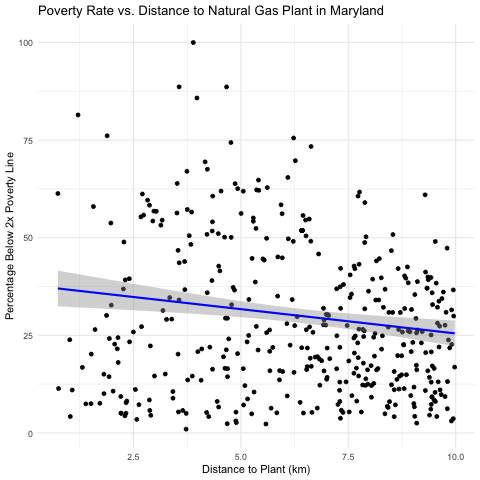

In [82]:
%%R

    ggplot(md_5_km) +
    aes(x=distance_to_plant, y=E_POV200)+
    geom_point()+
    geom_smooth(method = "lm", se = TRUE, color = "blue") +
  labs(
    title = "Poverty Rate vs. Distance to Natural Gas Plant in Maryland",
    x = "Distance to Plant (km)",
    y = "Percentage Below 2x Poverty Line"
  ) +
  theme_minimal()

In [83]:
%%R

model <- lm(distance_to_plant ~ E_AFAM, data=md_5_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_AFAM, data = md_5_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7331 -1.7917  0.2389  1.9937  3.7850 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6.130183   0.183206  33.461   <2e-16 ***
E_AFAM      0.004104   0.003503   1.172    0.242    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.399 on 435 degrees of freedom
  (20 observations deleted due to missingness)
Multiple R-squared:  0.003147,	Adjusted R-squared:  0.0008549 
F-statistic: 1.373 on 1 and 435 DF,  p-value: 0.2419



In [88]:
%%R

model <- lm(distance_to_plant ~ E_MINRTY, data=md_5_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_MINRTY, data = md_5_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.8465 -1.7968  0.1827  1.9008  4.0870 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.477089   0.299491  18.288  < 2e-16 ***
E_MINRTY    0.012892   0.004353   2.962  0.00323 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.379 on 435 degrees of freedom
  (20 observations deleted due to missingness)
Multiple R-squared:  0.01976,	Adjusted R-squared:  0.01751 
F-statistic: 8.771 on 1 and 435 DF,  p-value: 0.003229



In [86]:
%%R

model <- lm(E_ASTHMA ~ distance_to_plant, data=md_5_km)
summary(model)


Call:
lm(formula = E_ASTHMA ~ distance_to_plant, data = md_5_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6375 -1.3136 -0.0345  0.9972  6.6054 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       11.68120    0.23716  49.255   <2e-16 ***
distance_to_plant -0.01856    0.03517  -0.528    0.598    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.76 on 434 degrees of freedom
  (21 observations deleted due to missingness)
Multiple R-squared:  0.0006413,	Adjusted R-squared:  -0.001661 
F-statistic: 0.2785 on 1 and 434 DF,  p-value: 0.5979



`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 21 rows containing non-finite outside the scale range
(`stat_smooth()`). 

R[write to console]: 2: Removed 21 rows containing missing values or values outside the scale range
(`geom_point()`). 



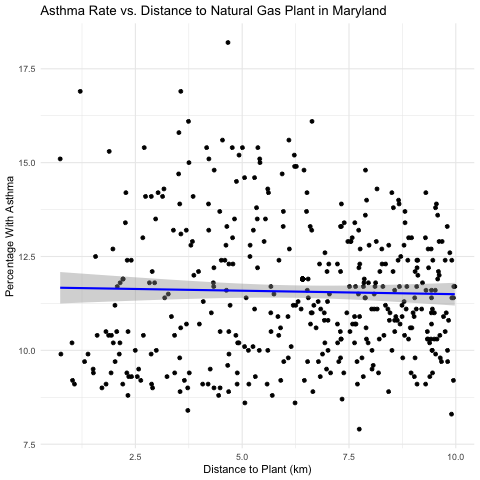

In [87]:
%%R

    ggplot(md_5_km) +
    aes(x=distance_to_plant, y=E_ASTHMA)+
    geom_point()+
    geom_smooth(method = "lm", se = TRUE, color = "blue") +
  labs(
    title = "Asthma Rate vs. Distance to Natural Gas Plant in Maryland",
    x = "Distance to Plant (km)",
    y = "Percentage With Asthma"
  ) +
  theme_minimal()

In [160]:
%%R -i md
# Logistic regression with county fixed effects
model <- feglm(
  natgas_noplant ~ E_POV200 + E_AFAM | county, 
  data = md, 
  family = binomial("logit")
)

summary(model)

GLM estimation, family = binomial, Dep. Var.: natgas_noplant
Observations: 770
Fixed-effects: county: 7
Standard-errors: Clustered (county) 
          Estimate Std. Error   z value   Pr(>|z|)    
E_POV200 -0.096465   0.027783 -3.472072 0.00051646 ***
E_AFAM    0.011240   0.020719  0.542526 0.58745619    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Log-Likelihood: -50.5   Adj. Pseudo R2: -0.014809
           BIC: 160.8     Squared Cor.:  0.035658


NOTES: 183 observations removed because of NA values (LHS: 177, RHS: 9).
       17 fixed-effects (573 observations) removed because of only 0 (or only 1) outcomes.


In [133]:
%%R -i md
logistic <- glm(natural_gas ~ E_POV200, data=md, family="binomial")
summary(logistic)


Call:
glm(formula = natural_gas ~ E_POV200, family = "binomial", data = md)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.94466    0.52192  -7.558 4.09e-14 ***
E_POV200    -0.05529    0.03043  -1.817   0.0693 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 130.31  on 1516  degrees of freedom
Residual deviance: 125.83  on 1515  degrees of freedom
  (9 observations deleted due to missingness)
AIC: 129.83

Number of Fisher Scoring iterations: 8



In [134]:
%%R

PseudoR2(logistic, which='McFadden')

  McFadden 
0.03436401 


### SPL_SVM_DOM4 - Domain consisting of mobile homes and housing with group quarters

In [135]:
%%R -i md
logistic <- glm(natural_gas ~ SPL_SVM_DOM4, data=md, family="binomial")
summary(logistic)


Call:
glm(formula = natural_gas ~ SPL_SVM_DOM4, family = "binomial", 
    data = md)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -5.8851     0.6643  -8.860   <2e-16 ***
SPL_SVM_DOM4   1.2845     0.6709   1.914   0.0556 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 130.31  on 1516  degrees of freedom
Residual deviance: 126.62  on 1515  degrees of freedom
  (9 observations deleted due to missingness)
AIC: 130.62

Number of Fisher Scoring iterations: 8



In [136]:
%%R

PseudoR2(logistic, which='McFadden')

  McFadden 
0.02829916 


In [137]:
%%R -i md
logistic <- glm(natural_gas ~ E_POV200 + E_AFAM + E_HISP + E_LIMENG + SPL_SVM_DOM4, data=md, family="binomial")
summary(logistic)


Call:
glm(formula = natural_gas ~ E_POV200 + E_AFAM + E_HISP + E_LIMENG + 
    SPL_SVM_DOM4, family = "binomial", data = md)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -5.36455    0.93479  -5.739 9.54e-09 ***
E_POV200     -0.07464    0.03354  -2.225   0.0260 *  
E_AFAM        0.01683    0.01105   1.524   0.1276    
E_HISP        0.05595    0.05948   0.941   0.3469    
E_LIMENG     -0.29467    0.24539  -1.201   0.2298    
SPL_SVM_DOM4  1.72920    0.77517   2.231   0.0257 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 130.31  on 1516  degrees of freedom
Residual deviance: 116.95  on 1511  degrees of freedom
  (9 observations deleted due to missingness)
AIC: 128.95

Number of Fisher Scoring iterations: 9



In [138]:
%%R

PseudoR2(logistic, which='McFadden')

 McFadden 
0.1025147 


In [139]:
%%R -i md
logistic <- glm(natural_gas ~ E_POV200 + E_AFAM + E_HISP + E_AIAN + E_LIMENG + SPL_SVM_DOM4 + E_UNEMP + E_NOHSDP + E_UNINSUR + E_TOTPOP + E_PARK + E_AGE17 + E_AGE65 + EPL_ROAD + E_RAIL + E_AIRPRT + EPL_IMPWTR + EPL_SMOKE + E_NOINT + E_HOUBDN + E_RENTER + E_DAYPOP, data=md, family="binomial")
summary(logistic)


Call:
glm(formula = natural_gas ~ E_POV200 + E_AFAM + E_HISP + E_AIAN + 
    E_LIMENG + SPL_SVM_DOM4 + E_UNEMP + E_NOHSDP + E_UNINSUR + 
    E_TOTPOP + E_PARK + E_AGE17 + E_AGE65 + EPL_ROAD + E_RAIL + 
    E_AIRPRT + EPL_IMPWTR + EPL_SMOKE + E_NOINT + E_HOUBDN + 
    E_RENTER + E_DAYPOP, family = "binomial", data = md)

Coefficients:
               Estimate Std. Error z value Pr(>|z|)  
(Intercept)   3.155e+00  7.581e+00   0.416   0.6773  
E_POV200     -9.114e-02  6.720e-02  -1.356   0.1750  
E_AFAM        1.341e-02  1.565e-02   0.857   0.3914  
E_HISP        3.587e-02  7.897e-02   0.454   0.6497  
E_AIAN       -1.722e-01  1.230e+00  -0.140   0.8886  
E_LIMENG     -2.053e-01  2.759e-01  -0.744   0.4567  
SPL_SVM_DOM4  1.377e+00  8.564e-01   1.608   0.1078  
E_UNEMP       1.372e-01  1.178e-01   1.165   0.2440  
E_NOHSDP      1.321e-01  1.090e-01   1.212   0.2254  
E_UNINSUR    -1.635e-01  1.621e-01  -1.009   0.3131  
E_TOTPOP      1.202e-04  1.764e-04   0.681   0.4957  
E_PARK       -1

In [140]:
%%R

PseudoR2(logistic, which='McFadden')

 McFadden 
0.2922839 


In [141]:
%%R -i md
model <- lm(E_CANCER ~ natural_gas + E_POV200 + E_AFAM + E_HISP + E_AIAN + E_LIMENG + SPL_SVM_DOM4 + E_UNEMP + E_NOHSDP + E_UNINSUR + E_TOTPOP + E_PARK + E_AGE17 + E_AGE65 + EPL_ROAD + E_RAIL + E_AIRPRT + EPL_IMPWTR + EPL_SMOKE + E_NOINT + E_HOUBDN + E_RENTER + E_DAYPOP, data=md)
summary(model)


Call:
lm(formula = E_CANCER ~ natural_gas + E_POV200 + E_AFAM + E_HISP + 
    E_AIAN + E_LIMENG + SPL_SVM_DOM4 + E_UNEMP + E_NOHSDP + E_UNINSUR + 
    E_TOTPOP + E_PARK + E_AGE17 + E_AGE65 + EPL_ROAD + E_RAIL + 
    E_AIRPRT + EPL_IMPWTR + EPL_SMOKE + E_NOINT + E_HOUBDN + 
    E_RENTER + E_DAYPOP, data = md)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6012 -0.4650 -0.0169  0.5185  3.0291 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.649e+00  4.890e-01   7.462 1.44e-13 ***
natural_gas  -2.903e-01  2.577e-01  -1.127 0.260014    
E_POV200     -4.896e-03  3.294e-03  -1.486 0.137479    
E_AFAM       -3.716e-02  1.026e-03 -36.225  < 2e-16 ***
E_HISP       -3.890e-02  3.504e-03 -11.104  < 2e-16 ***
E_AIAN       -1.588e-01  4.726e-02  -3.360 0.000800 ***
E_LIMENG     -2.408e-02  8.267e-03  -2.913 0.003629 ** 
SPL_SVM_DOM4  2.160e-01  5.576e-02   3.873 0.000112 ***
E_UNEMP      -1.829e-03  6.788e-03  -0.270 0.787575    
E_NOHSDP     -1.221e

In [142]:
%%R -i md
model <- lm(E_CANCER ~ E_AGE65 + E_AGE17, data=md)
summary(model)


Call:
lm(formula = E_CANCER ~ E_AGE65 + E_AGE17, data = md)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7517 -1.1842  0.0443  1.3227  4.0177 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.692875   0.217336   7.789 1.24e-14 ***
E_AGE65     0.258748   0.005651  45.786  < 2e-16 ***
E_AGE17     0.066837   0.007298   9.158  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.613 on 1516 degrees of freedom
  (7 observations deleted due to missingness)
Multiple R-squared:  0.592,	Adjusted R-squared:  0.5915 
F-statistic:  1100 on 2 and 1516 DF,  p-value: < 2.2e-16



In [143]:
%%R -i md
model <- lm(E_ASTHMA ~ natural_gas, data=md)
summary(model)


Call:
lm(formula = E_ASTHMA ~ natural_gas, data = md)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5551 -0.9551 -0.1551  0.7449  7.1449 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.05511    0.03642 303.567   <2e-16 ***
natural_gas -0.30056    0.42795  -0.702    0.483    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.414 on 1517 degrees of freedom
  (7 observations deleted due to missingness)
Multiple R-squared:  0.0003251,	Adjusted R-squared:  -0.0003339 
F-statistic: 0.4933 on 1 and 1517 DF,  p-value: 0.4826



In [144]:
%%R -i md
model <- lm(E_ASTHMA ~ natural_gas + E_POV200 + E_AFAM + E_HISP + E_AIAN + E_LIMENG + SPL_SVM_DOM4 + E_UNEMP + E_NOHSDP + E_UNINSUR + E_TOTPOP + E_PARK + E_AGE17 + E_AGE65 + EPL_ROAD + E_RAIL + E_AIRPRT + EPL_IMPWTR + EPL_SMOKE + E_NOINT + E_HOUBDN + E_RENTER + E_DAYPOP, data=md)
summary(model)


Call:
lm(formula = E_ASTHMA ~ natural_gas + E_POV200 + E_AFAM + E_HISP + 
    E_AIAN + E_LIMENG + SPL_SVM_DOM4 + E_UNEMP + E_NOHSDP + E_UNINSUR + 
    E_TOTPOP + E_PARK + E_AGE17 + E_AGE65 + EPL_ROAD + E_RAIL + 
    E_AIRPRT + EPL_IMPWTR + EPL_SMOKE + E_NOINT + E_HOUBDN + 
    E_RENTER + E_DAYPOP, data = md)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.75548 -0.38783  0.01452  0.39132  1.88346 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   8.793e+00  3.455e-01  25.446  < 2e-16 ***
natural_gas   6.567e-02  1.821e-01   0.361 0.718406    
E_POV200      4.524e-02  2.328e-03  19.433  < 2e-16 ***
E_AFAM        1.406e-02  7.249e-04  19.398  < 2e-16 ***
E_HISP       -2.592e-02  2.476e-03 -10.470  < 2e-16 ***
E_AIAN       -3.692e-02  3.339e-02  -1.106 0.269028    
E_LIMENG     -6.049e-02  5.842e-03 -10.355  < 2e-16 ***
SPL_SVM_DOM4  4.734e-02  3.940e-02   1.201 0.229768    
E_UNEMP       7.458e-03  4.797e-03   1.555 0.120214    
E_NOHSDP  

In [145]:
%%R -i md
model <- lm(E_CHD ~ natural_gas, data=md)
summary(model)


Call:
lm(formula = E_CHD ~ natural_gas, data = md)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.2071 -1.1071 -0.2071  0.9929 11.5929 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.1071     0.0445 137.246   <2e-16 ***
natural_gas  -1.1253     0.5229  -2.152   0.0316 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.728 on 1517 degrees of freedom
  (7 observations deleted due to missingness)
Multiple R-squared:  0.003044,	Adjusted R-squared:  0.002386 
F-statistic: 4.631 on 1 and 1517 DF,  p-value: 0.03155



In [146]:
%%R -i md
model <- lm(E_CHD ~ E_AGE65 + E_AGE17, data=md)
summary(model)


Call:
lm(formula = E_CHD ~ E_AGE65 + E_AGE17, data = md)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2557 -0.9156 -0.2098  0.7253  6.2453 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.427621   0.173008  14.032   <2e-16 ***
E_AGE65     0.156181   0.004499  34.718   <2e-16 ***
E_AGE17     0.050567   0.005810   8.704   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.284 on 1516 degrees of freedom
  (7 observations deleted due to missingness)
Multiple R-squared:  0.4497,	Adjusted R-squared:  0.449 
F-statistic: 619.4 on 2 and 1516 DF,  p-value: < 2.2e-16



In [147]:
%%R -i md
model <- lm(E_CHD ~ natural_gas + E_POV200 + E_AFAM + E_HISP + E_AIAN + E_LIMENG + SPL_SVM_DOM4 + E_UNEMP + E_NOHSDP + E_UNINSUR + E_TOTPOP + E_PARK + E_AGE17 + E_AGE65 + EPL_ROAD + E_RAIL + E_AIRPRT + EPL_IMPWTR + EPL_SMOKE + E_NOINT + E_HOUBDN + E_RENTER + E_DAYPOP, data=md)
summary(model)


Call:
lm(formula = E_CHD ~ natural_gas + E_POV200 + E_AFAM + E_HISP + 
    E_AIAN + E_LIMENG + SPL_SVM_DOM4 + E_UNEMP + E_NOHSDP + E_UNINSUR + 
    E_TOTPOP + E_PARK + E_AGE17 + E_AGE65 + EPL_ROAD + E_RAIL + 
    E_AIRPRT + EPL_IMPWTR + EPL_SMOKE + E_NOINT + E_HOUBDN + 
    E_RENTER + E_DAYPOP, data = md)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7495 -0.4270  0.0152  0.4308  3.5948 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.617e+00  4.305e-01   3.757 0.000179 ***
natural_gas  -1.250e-01  2.269e-01  -0.551 0.581769    
E_POV200      4.738e-02  2.900e-03  16.335  < 2e-16 ***
E_AFAM       -4.557e-03  9.031e-04  -5.047 5.05e-07 ***
E_HISP       -2.297e-02  3.084e-03  -7.446 1.62e-13 ***
E_AIAN       -5.811e-02  4.160e-02  -1.397 0.162693    
E_LIMENG     -3.280e-02  7.278e-03  -4.507 7.10e-06 ***
SPL_SVM_DOM4  3.154e-01  4.908e-02   6.427 1.75e-10 ***
E_UNEMP       1.863e-02  5.976e-03   3.117 0.001860 ** 
E_NOHSDP      4.781e-02